In [88]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import datetime
import re
from wordcloud import WordCloud
from datetime import datetime, timedelta
import matplotlib.dates as mdates
!pip install scikit-learn
from sklearn.preprocessing import LabelEncoder

ModuleNotFoundError: No module named 'wordcloud'

In [8]:
#Read the excel file and store the sheets into dataframes.
df = pd.ExcelFile(r"V02Max_Combined.xlsx")
kay = pd.read_excel(df, sheet_name = 'Kayaking')
ath = pd.read_excel(df, sheet_name = 'Athletes')
tri = pd.read_excel(df, sheet_name = 'Triathlon')
fen = pd.read_excel(df, sheet_name = 'Fencing')

## Qn1:Join all sport-related tables to produce one dataframe that has all athletes values. The final table should only have the same 5 columns: ID, time,power,RR, vo2, power. Write this dataframe to an excel file.

In [15]:
#Concatenating all sport related table to one dataframe final_table
final_table=pd.concat([fen[['ID','time','RR','VO2','power']],
                       kay[['ID','time','RR','VO2','power']],
                       tri[['ID','time','RR','VO2','power']]],ignore_index=True)

#defining output excel file name
output='FinalVO2_Table.xlsx'

#writing dataframe to excel using to_excel
final_table.to_excel(output,index=False)
print("Dataframe successfully written to Excel file",output)

#Reading the excel file back into dataframe for verification
print("\nReading",output,"Excel file for Verification:")
sportdf=pd.read_excel("FinalVO2_Table.xlsx")
print(sportdf)

Dataframe successfully written to Excel file FinalVO2_Table.xlsx

Reading FinalVO2_Table.xlsx Excel file for Verification:
       ID     time     RR       VO2  power
0       1 -130.840  672.0  0.302008      0
1       1 -130.168  672.0  0.302008      0
2       1 -129.536  632.0  0.301336      0
3       1 -128.824  712.0  0.301336      0
4       1 -127.948  876.0  0.301336      0
...    ..      ...    ...       ...    ...
52057  18  947.288  536.0  0.507071      0
52058  18  947.816  528.0  0.507071      0
52059  18  948.344  528.0  0.507071      0
52060  18  948.884  540.0  0.507071      0
52061  18  949.424  540.0  0.507071      0

[52062 rows x 5 columns]


## Qn2:Divide the rows into 3 parts: Warm up, GET(graded exercise test) and cool down using the data def. Label each row accordingly

In [17]:
#Initialize Dataframe phase
phase=pd.DataFrame(final_table)

#initialize Phase column
phase['Phase']='Other Phase'

#Apply conditions to find Warm Up-time less than 0,GET-time>=0 and power>0,Cool Down-time>0 and power=0
phase.loc[phase['time']<0,'Phase']='Warm Up'
phase.loc[(phase['time']>=0) & (phase['power']>0),'Phase']='GET'
phase.loc[(phase['time']>0) & (phase['power']==0),'Phase']='Cool Down'

#print dataframe phase details
print(phase)

       ID     time     RR       VO2  power      Phase
0       1 -130.840  672.0  0.302008      0    Warm Up
1       1 -130.168  672.0  0.302008      0    Warm Up
2       1 -129.536  632.0  0.301336      0    Warm Up
3       1 -128.824  712.0  0.301336      0    Warm Up
4       1 -127.948  876.0  0.301336      0    Warm Up
...    ..      ...    ...       ...    ...        ...
52057  18  947.288  536.0  0.507071      0  Cool Down
52058  18  947.816  528.0  0.507071      0  Cool Down
52059  18  948.344  528.0  0.507071      0  Cool Down
52060  18  948.884  540.0  0.507071      0  Cool Down
52061  18  949.424  540.0  0.507071      0  Cool Down

[52062 rows x 6 columns]


## Qn3:What was the average time each test lasted excluding warm-up for all athletes?

In [63]:
#Exclude warmup phase
excludeWarmup = phase[phase['Phase'] != 'Warm Up']

# Find the average Time for GET and COOL DOWN
avg_time=excludeWarmup.groupby('Phase')['time'].mean().reset_index(name='Average Time')

#print average time
print("Average Time for GET and COOL DOWN:")
avg_time.style.hide(axis='index')


Average Time for GET and COOL DOWN:


Phase,Average Time
Cool Down,993.988405
GET,512.492916


## Qn04:Athletes from which sport had the highest average cardiorespiratory fitness in terms of HRV?

In [29]:
# Initialize Dataframe 
hrv_df=pd.DataFrame(final_table)

# Calculate RR change
hrv_df['RR Change'] = hrv_df.groupby('ID')['RR'].diff()

#Calculate hrv using std()
hrv=hrv_df.groupby('ID')['RR Change'].std().reset_index(name='HRV')

#merge hrv and athletes table
merge_hrv=hrv.merge(ath,on='ID',how='left')

#find average hrv by sports
Average_hrv=merge_hrv.groupby('sport')['HRV'].mean().reset_index(name='Average HRV')

#Sort descending and find the max average hrv sport details
Average_hrvdetails=Average_hrv.sort_values(by='Average HRV',ascending=False).head(1)

#Print result
print(f"Athletes from sport:{Average_hrvdetails['sport'].values[0]} had the highest average HRV: {Average_hrvdetails['Average HRV'].values[0]}")
 

Athletes from sport:kayak had the highest average HRV: 170.64090949012146


## Qn5:What was the average time each test lasted (including warm up) for all athletes?

In [117]:
# Find the average Time for all phases
avg_time=phase.groupby('Phase')['time'].mean().reset_index(name='Average Time')

#print average time
print("Average Time for ALL Phases:")
avg_time.style.hide(axis='index')


Average Time for ALL Phases:


Phase,Average Time
Cool Down,993.988405
GET,512.492916
Warm Up,-90.058246


## Qn6:What was the most common wattage (above 0) achieved by participants and for how many seconds (average time)? You may choose to show averages based on any one/all sports.

In [130]:
# form dataframe where power greater then 0
powerdf=pd.DataFrame(final_table)
new_sportdf= powerdf[powerdf['power']>0]

#calculate most common wattage using mode function
mcw= new_sportdf['power'].mode()[0]

# print result
print("Most common wattage (above 0) achieved by participants is: ", mcw)
mcw_data=new_sportdf[new_sportdf['power'] == mcw]

#average of most common wattage 
avg_time=mcw_data['time'].mean()

#print Average time for all sports
print("Average time for all sports with 50 watts is: ", avg_time)

Most common wattage (above 0) achieved by participants is:  50
Average time for all sports with 50 watts is:  92.2396158663883


## Qn7:Create a correlation matrix to show the relationship between HR, BMI, and sport.

Correlation matrix is : 
                       HR       bmi  sport_fencing  sport_kayak  \
HR               1.000000 -0.056952       0.039244    -0.035366   
bmi             -0.056952  1.000000      -0.146334     0.520190   
sport_fencing    0.039244 -0.146334       1.000000    -0.821351   
sport_kayak     -0.035366  0.520190      -0.821351     1.000000   
sport_triathlon -0.008736 -0.607475      -0.345537    -0.251481   

                 sport_triathlon  
HR                     -0.008736  
bmi                    -0.607475  
sport_fencing          -0.345537  
sport_kayak            -0.251481  
sport_triathlon         1.000000  


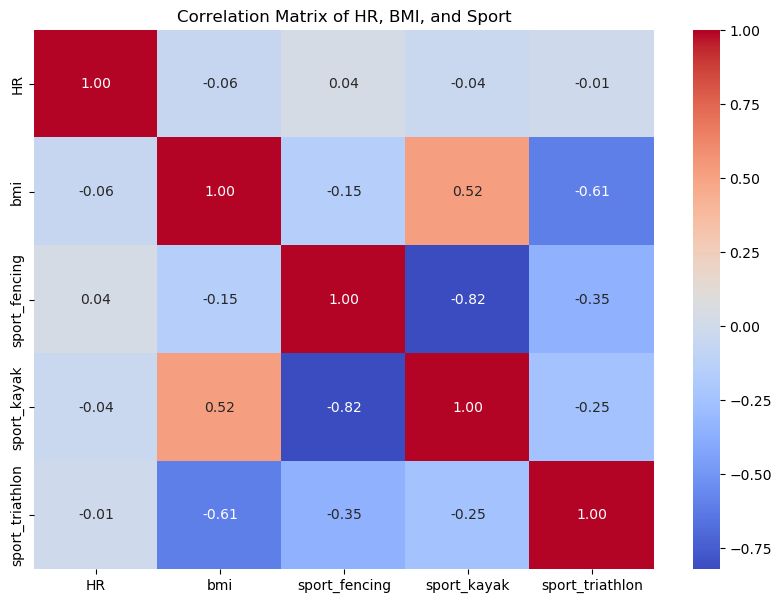

In [100]:
# Initialize dataframe
ath_1=pd.DataFrame(ath)
hr_1=pd.DataFrame(final_table)

#calculating BMI values
ath_1['bmi']=round((ath_1['Weight']/((ath_1['Height']/100)**2)),2)

#Calculate HR ( Heart Rate )
hr_1['HR']=round(60/(hr_1['RR']/1000),2)

#  merge data frame
merge_bmi=pd.merge(ath_1,hr_1, on="ID")

# Create a DataFrame with only the columns needed for correlation
correlation_df = merge_bmi[['HR', 'bmi', 'sport']]

# Convert categorical 'Sport' to numerical using one-hot encoding
corr_encode = pd.get_dummies(correlation_df, columns = ['sport'])
corr_matrix=corr_encode.corr()

#print matrix
print("Correlation matrix is : ")
print(corr_matrix)

# plotting correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of HR, BMI, and Sport')
plt.show()


## Qn8:What are the names of the kayaking athletes?

In [23]:
# loading value from 'ath' DataFrame
nam=pd.DataFrame(ath)

# Filter for kayaking athletes
kayak_names = nam[nam['sport'] == 'kayak']

# Extract and print the names of Kayak athletes 
print("Kayaking Athletes Names:")
print(kayak_names['First Name']+" "+kayak_names['Last Name'])

Kayaking Athletes Names:
10    Isabella Griffin
11         Caleb Dixon
12       Mia Carpenter
13     Harper Mitchell
14       Mason Wallace
15      Logan Anderson
dtype: object


## Qn9:What was the average HRV of the triathletes?

In [57]:

#Display average HRV values sport wise
print(Average_hrv)

# find Average HRV of the triathletes
avg_hrv = pd.DataFrame(Average_hrv).set_index('sport')
tri_avg=round(avg_hrv.loc['triathlon','Average HRV'],2)

#print Average HRV of the triathletes
print("Average HRV of the triathletes:",tri_avg )


       sport  Average HRV
0    fencing   126.057801
1      kayak   170.640909
2  triathlon    29.293777
Average HRV of the triathletes: 29.29


## Qn10:How long was athlete 12 in HR Zone 5?

In [61]:
#Calculate time in minutes,Heart Rate(HR)=60/(RR/1000),Max HeartRate(MaxHR)=220-age
zone_merged=pd.DataFrame(final_table)
zone_ath=pd.DataFrame(ath)
zone_det=zone_merged.merge(zone_ath[['ID','age']],on='ID')
zone_det['HR']=60/(zone_det['RR']/1000)
zone_det['MaxHR']=220-zone_det['age']

#Calculate Zone as per question 
Zone_1= zone_det['HR'] <100
Zone_2 = (zone_det['HR'] >=100 ) & (zone_det['HR']<120)
Zone_3=(zone_det['HR'] >=120 ) & (zone_det['HR']<135)
Zone_4=(zone_det['HR'] >=135 ) & (zone_det['HR']<155)

zone_det['Zone'] = 'Zone 5 (anaerobic)'
zone_det.loc[Zone_1, 'Zone'] = 'Zone 1 (recovery/easy)'
zone_det.loc[Zone_2, 'Zone'] = 'Zone 2 (aerobic/base)'
zone_det.loc[Zone_3, 'Zone'] = 'Zone 3 (tempo)'
zone_det.loc[Zone_4, 'Zone'] = 'Zone 4 (lactate threshold)'

# calculating Time Zone 5 Athlete ID 
zone5_hr=zone_det[(zone_det['ID'] == 12) & (zone_det['Zone'] =='Zone 5 (anaerobic)' )]

# calculating Time spent by Athlete 
zone5_time = zone5_hr['time'].sum()

print(f"Time spent by Athlete 12 in HR Zone 5 is {zone5_time} seconds .")

Time spent by Athlete 12 in HR Zone 5 is 1406708.024 seconds .


## Qn11: Create any 3d plot using any data. Values do not have to be from the dataset given.

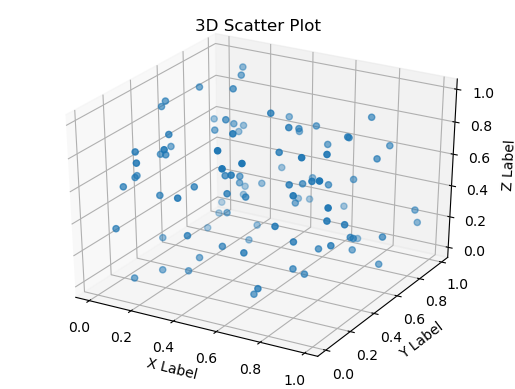

In [67]:
from mpl_toolkits.mplot3d import Axes3D
# Generate random data
np.random.seed(42)  # For reproducibility
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(x, y, z)

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

plt.show()

## Qn12:What were the Highest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes.¶

In [71]:
#Load athlete details into dataframe
VO2ml=pd.DataFrame(ath)

#Sum the VO2 values for each ID
Sum_VO2 = final_table.groupby('ID')['VO2'].sum().reset_index() 

#Merge sum of VO2 values for each id to VO2ml dataframe
VO2ml=VO2ml.merge(Sum_VO2,on='ID')

#Find VO2ml/kg which is VO2ml/min divided by each athlete weight
VO2ml['VO2ml/kg']=VO2ml['VO2']/VO2ml['Weight']

#Highest 3 V02 Maxes record using nlargest method

top_3_vo2max = VO2ml.nlargest(3, 'VO2ml/kg')[['ID','First Name','Last Name','sport','VO2ml/kg']]


print('Athlete Details with Highest 3 V02 Maxes record:')

#display every athlete's VO2ml/kg values
top_3_vo2max.style.hide(axis='index')

Athlete Details with Highest 3 V02 Maxes record:


ID,First Name,Last Name,sport,VO2ml/kg
12,Caleb,Dixon,kayak,92.258212
13,Mia,Carpenter,kayak,90.758693
11,Isabella,Griffin,kayak,89.586903


## Qn13:Calculate the year of birth of each athlete and store it as a column in the tables.

In [80]:
from datetime import datetime

# initialize DataFrame
year = pd.DataFrame(ath)

#Calculates the year of birth given the current age and year.
current_year = datetime.now().year

#Calculates the year of birth of each athlete 
year['birth_year'] = current_year - year['age']

#Print year of birth of each athlete 
print(year.to_string(index=False))

 ID  age  Weight  Height  P_vt1  P_vt2     sport Gender Ethnicity First Name Last Name  birth_year
  1   15    53.7     161     50    140   fencing Female   African     Olivia  Martinez        2009
  2   15    56.2     162     80    127   fencing   Male   African      Ethan  Reynolds        2009
  3   16    89.9     191    155    300   fencing   Male     White    Jackson    Harper        2008
  4   16    76.5     180    215    275   fencing   Male     White       Liam   Sanchez        2008
  5   17    76.4     186    110    172   fencing Female     White        Ava  Thompson        2007
  6   17    65.6     169    131    186   fencing Female     White     Sophia Rodriguez        2007
  7   15    49.8     165     65    108   fencing Female     White      Grace   Simmons        2009
  8   15    51.2     165     80    133   fencing Female     White      Aiden   Bennett        2009
  9   14    57.1     176     50    125   fencing Female   African      Chloe     Price        2010
 10   14  

## Qn:14 What were the lowest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes.

In [86]:
#Lowest 3 V02 Maxes record using nsmallest method from VO2ml table
bottom_3_vo2min = VO2ml.nsmallest(3, 'VO2ml/kg')[['ID','First Name','Last Name','sport','VO2ml/kg']]


print('Athlete Details lowest 3 V02  record')

#display every athlete's VO2ml/kg values
bottom_3_vo2min.style.hide(axis='index')


Athlete Details lowest 3 V02  record


ID,First Name,Last Name,sport,VO2ml/kg
7,Grace,Simmons,fencing,38.403988
2,Ethan,Reynolds,fencing,38.632602
1,Olivia,Martinez,fencing,42.807730


## Qn15:"Assign 1 of the following 5 heart rate zones for every record for all sports and athletes and add this as a column to every table:
## Zone 1 (recovery/easy)       <100 HR max
## Zone 2 (aerobic/base)        100-120 HR max
## Zone 3 (tempo)        120-135 HR max
## Zone 4 (lactate threshold)        135-155 HR max
## Zone 5 (anaerobic)        155+ HR max and above"

In [94]:

#Calculate time in minutes,Heart Rate(HR)=60/(RR/1000),Max HeartRate(MaxHR)=220-age
zone_merged=pd.DataFrame(final_table)
zone_ath=pd.DataFrame(ath)
zone_det=zone_merged.merge(zone_ath[['ID','age']],on='ID')
zone_det['HR']=60/(zone_det['RR']/1000)
zone_det['MaxHR']=220-zone_det['age']

# initialize zone ranges
Zone_1= zone_det['HR'] <100
Zone_2 = (zone_det['HR'] >=100 ) & (zone_det['HR']<120)
Zone_3=(zone_det['HR'] >=120 ) & (zone_det['HR']<135)
Zone_4=(zone_det['HR'] >=135 ) & (zone_det['HR']<155)

#apply zone ranges
zone_det['Zone'] = 'Zone 5 (anaerobic)'
zone_det.loc[Zone_1, 'Zone'] = 'Zone 1 (recovery/easy)'
zone_det.loc[Zone_2, 'Zone'] = 'Zone 2 (aerobic/base)'
zone_det.loc[Zone_3, 'Zone'] = 'Zone 3 (tempo)'
zone_det.loc[Zone_4, 'Zone'] = 'Zone 4 (lactate threshold)'

#merge zone details with athletes dataframe
zone_alldet=zone_ath.merge(zone_det,on=['ID','age'])

#print all details
zone_alldet


,ID,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name,time,RR,VO2,power,HR,MaxHR,Zone
0,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez,-130.840,672.0,0.302008,0,89.285714,205,Zone 1 (recovery/easy)
1,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez,-130.168,672.0,0.302008,0,89.285714,205,Zone 1 (recovery/easy)
2,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez,-129.536,632.0,0.301336,0,94.936709,205,Zone 1 (recovery/easy)
3,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez,-128.824,712.0,0.301336,0,84.269663,205,Zone 1 (recovery/easy)
4,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez,-127.948,876.0,0.301336,0,68.493151,205,Zone 1 (recovery/easy)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52057,18,12,39.7,158,65,168,triathlon,Male,Latino,Owen,Myers,947.288,536.0,0.507071,0,111.940299,208,Zone 2 (aerobic/base)
52058,18,12,39.7,158,65,168,triathlon,Male,Latino,Owen,Myers,947.816,528.0,0.507071,0,113.636364,208,Zone 2 (aerobic/base)
52059,18,12,39.7,158,65,168,triathlon,Male,Latino,Owen,Myers,948.344,528.0,0.507071,0,113.636364,208,Zone 2 (aerobic/base)
52060,18,12,39.7,158,65,168,triathlon,Male,Latino,Owen,Myers,948.884,540.0,0.507071,0,111.111111,208,Zone 2 (aerobic/base)


## Qn16:Calculate the BMI of every athlete and display it as a list.

In [109]:
#initialize dataframe
bmi_1=pd.DataFrame(ath)

#calculating BMI values
bmi_1['bmi']=round((bmi_1['Weight']/((bmi_1['Height']/100)**2)),2)

# change bmi column to list from ath_1 dataframe
bmi_list=bmi_1['bmi'].tolist()

#print list
print("BMI of every athlete in list:",bmi_list)


BMI of every athlete in list: [20.72, 21.41, 24.64, 23.61, 22.08, 22.97, 18.29, 18.81, 18.43, 18.77, 25.6, 25.68, 25.05, 21.31, 21.46, 21.25, 16.4, 15.9]


## Qn17. Suvarna Add your questions from here

## Qn33. Create a list and a tuple. Print the types and lengths of both.

In [ ]:
#Create a List and tuple
List=[1,2,3,4,5,6,7,8,9,10,11,12]
print(List)
tuple=(10,20,30,40,50,60,70,80,90,10,20)
print(tuple)

#Print the types of both.
print(type(list))
print(type(tuple))

## Qn34. Display a word cloud using any values in the dataset.

In [ ]:
#Create dataframe
wcloud = pd.DataFrame(ath)

# Combine all athlete names into a single string
text = ' '.join(wcloud['Ethnicity'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Qn35. Create a Regression Plot on Max V02 and mean BMI for any sport of your choice.

In [ ]:
#Load athlete details into the dataframe
fname=pd.DataFrame(ath)

#Merge fname for each id to VO2_all dataframe
VO2_all=phase.merge(fname[['ID','Weight']],on='ID',how='right')

#Sum the VO2 values for each ID
VO2_MAX = VO2_all['VO2'].sum()/VO2_all[ 'Weight']
print(VO2_MAX)

#Filter data for fencing sport
sport_of_choice = 'fencing'
ath_sport= fname[fname['sport'] == sport_of_choice]
#print(ath_sport)
#Calculate BMI for fencing sport
ath_sport['BMI'] = ath_sport['Weight'] / (ath_sport['Height'] ** 2)

#Calculate mean BMI
mean_BMI = ath_sport['BMI'].mean()
#print(mean_BMI)
# Create a DataFrame
df = pd.DataFrame({'BMI': mean_BMI, 'VO2': VO2_MAX })

# Create a regression plot using Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='BMI', y='VO2', data=df, scatter_kws={'s':100}, line_kws={'color':'red'})

# Adding titles and labels
plt.title(f'Regression Plot of Max VO2 vs. Mean BMI for {sport_of_choice}')
plt.xlabel('BMI')
plt.ylabel('VO2_MAX (ml/kg/min)')

# Show plot
plt.show()

## Qn36. Plot the time series of HR( every 5 mins) of athlete 1.

In [ ]:
#Initialize dataframe ath_1
ath_1 = phase.loc[phase['ID'] == 1]

#Calculate HR of athlete 1
HR_ath1 = 60/(ath_1['RR']/1000)

#Create a synthetic timestamp starting from a chosen date/time
start_time =datetime(2024, 8, 21, 0, 0)  # August 21, 2024 at 00:00
time_points = [start_time + timedelta(minutes=5*i) for i in range(len(ath_1))]

#Create a DataFrame
df = pd.DataFrame({'Timestamp': time_points, 'HR': HR_ath1 })
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

#Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['HR'], marker="o", linestyle="-")

#Format x-axis to show date and time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

#Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()
plt.title('Heart Rate Time Series for Athlete 1')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Qn37. What was the maximum power achieved in terms of watts, which participant achieved it? Display name, sport and watts.

In [ ]:
#Initalize dataframe phase
max_power=pd.DataFrame(final_table)
fname=pd.DataFrame(ath)
max_power=max_power.merge(fname[['ID','First Name','Last Name','sport']],on='ID',how='right')

# Find the athlete with maximum power
max_power_row = max_power.loc[max_power['power'].idxmax()]

# Display relevant information
athlete_ID = max_power_row['ID']
first_name = max_power_row['First Name']
last_name = max_power_row['Last Name']
sport = max_power_row['sport']
max_power_watts = max_power_row['power']

print(f"Athlete: {first_name} {last_name}")
print(f"Sport: {sport}")
print(f"Maximum Power (Watts): {max_power_watts:.2f}")

## Qn38.What is the average difference in IBI during the warm up Vs the actual test?

In [ ]:
#RR interval and inter-beat interval (IBI) are both measurements of time between heartbeats,IBI is essentially the same as the RR interval.
#Calculate average IBI for each phase
avg_warm_up = phase[phase['Phase'] == 'Warm Up']['time'].mean()
avg_get = phase[phase['Phase'] == 'GET']['time'].mean()

#Calculate the difference in IBI in both phases
avg_diff= avg_get - avg_warm_up 

#Print average IBI for both phases and the difference
print(f"Average IBI during Warm-up: {avg_warm_up:.2f} ms")
print(f"Average IBI during Test: {avg_get:.2f} ms")
print(f"Average Difference: {avg_diff:.2f} ms")

## Qn39.Print out what's in indexes 7, 10, and 3 for the array. [1, 2, 3, 4, 5,6,7,8,9,10].



In [ ]:
#define the array
array=[1,2,3,4,5,6,7,8,9,10]
indices=[7,10,3]
for index in indices:
    if index < len(array):
        print(f"Element at index {index}: {array[index]}")
    else:
        print(f"Index {index} is out of range.")


## Qn40. " [ 1, 2, 3, 4, 5], [ 6, 7, 8, 9, 10], [11, 12, 13, 14, 15], [16, 17, 18, 19, 20], [21, 22, 23, 24, 25], [26, 27, 28, 29, 30] Use array slicing to display elements 1,3,5. If the value is less than 4 display it as 99".

In [ ]:
#Create the given array
arr = np.array([[1, 2, 3, 4, 5],
                [6, 7, 8, 9, 10],
                [11, 12, 13, 14, 15],
                [16, 17, 18, 19, 20],
                [21, 22, 23, 24, 25],
                [26, 27, 28, 29, 30]])

#Slice the array to get elements 1, 3, and 5 (index 0, 2, and 4)
sliced = arr[:, [0, 2, 4]]

#Replace values less than 4 with 99
value = np.where(sliced < 4, 99, sliced)
print(value)

## Qn41. What was lowest wattage achieved at the end of a test and by which participant? Display name, sport and watts.

In [ ]:
#Load athlete details into dataframe
fname=pd.DataFrame(ath)

#Merge fname values to each ID to min_power
min_power=phase.merge(fname[['ID','First Name','Last Name','sport']],on='ID',how='right')

#Calculate wattage at warm up phase 
wattage = min_power[min_power['Phase'] == 'Warm Up']['power'].idxmin()
print(wattage)

## Qn42. What was the difference in heart rate between warm up and GET for athlete 1.

In [ ]:
#Calculate RR value of Athlete 1 at warm up and GET phase
RR_warm_up = phase[(phase['Phase'] == 'Warm Up') & (phase['ID'] == 1)]['time'].mean()
print(f"Average warm up phase RR value for athlete 1: {RR_warm_up:.2f}ms")
RR_get = phase[(phase['Phase'] == 'GET') & (phase['ID'] == 1)]['time'].mean()
print(f"Average GET phase RR value for athlete 1: {RR_get:.2f}ms")

#Calculate the HR for warm up phase and GET phase
HR_warm_up = 60/(RR_warm_up/1000)
print(f"HR for warm up phase of athlete 1: {HR_warm_up:.2f}bpm")

HR_get = 60/(RR_get/1000)
print(f"HR for GET phase of athlete 1: {HR_get:.2f}bpm")

#Calculate the difference in HR for warmup and GET for Athlete 1
diff_HR = HR_get - HR_warm_up
print(f"Difference in HR: {diff_HR:.2f}bpm")

## Qn43. Create a pivot table that shows count of patients within each age group and sport.

In [ ]:
#Initialize dataframe pd
patients = pd.DataFrame(ath)
bins = [12, 13, 14, 15, 16, 17, 18]
labels = ['12', '13', '14', '15', '16', '17', '18']

# Create a pivot table with count of patients
pivot_table = pd.pivot_table(patients, values= 'ID', index='age', columns='sport', aggfunc='count', fill_value=0)

print(pivot_table)

## Qn44.Display a distrubution chart of MAX V02 for all athletes.

In [ ]:
#Load athlete details into the dataframe
fname=pd.DataFrame(ath)

#Merge fname for each id to VO2_all dataframe
VO2_all=phase.merge(fname[['ID','Weight']],on='ID',how='right')

#Sum the VO2 values for each ID
VO2_MAX = VO2_all['VO2'].sum()/VO2_all[ 'Weight']

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(VO2_MAX, bins=18, kde=True, color='blue')

# Adding titles and labels
plt.title('Distribution of Maximum VO2 for All Athletes')
plt.xlabel('Maximum VO2 (ml/kg/min)')
plt.ylabel('Frequency')

# Show plot
plt.show()

## Qn45. Create a dummy array with no data with a size of 15.

In [ ]:
dummy_array = np.empty(15)

## Qn.46.How many minutes did participant 15s exercise last and what was the total V02 max consumed during the test?

In [ ]:
#Merge dataframes
VO2=phase.merge(fname[['ID','Weight']],on='ID',how='right')

#Filtering for a Specific Athlete and Phase:
VO2 = VO2.loc[(VO2['ID'] == 15) & (VO2['Phase'] == 'GET')]

#Calculate VO2_MAX
VO2_MAX = VO2['VO2'].sum()/VO2[ 'Weight'].mean()

#Calculate the exercise time of Athlete 15
Exec_Time = VO2['time'].sum() /(1000 * 60)
print(f"Total VO2 max of test phase: {VO2_MAX}")
print(f"Excercise time of Athlete 15 is {Exec_Time:.2f} minutes")

## Qn47.Convert ' sport' into a numeric field through Label encoding.

In [ ]:
#Initialize LabelEncoder
lab = LabelEncoder()

#Fit and transform the 'sport' column
ath['sport'] = lab.fit_transform(ath['sport'])
print(ath)

## Qn48. What was the average age of the athletes?

In [ ]:
#Read the excel file and store the sheets into dataframes.
ath = pd.read_excel(df, sheet_name = 'Athletes')

# Calculate the average age and print
average_age = ath['age'].mean()
print(f"Average age of athletes: {average_age:.2f} years")

## Qn49:Retrieve the row with minimum IBI for fencing athletes using sorting technique.

In [ ]:
#RR interval and inter-beat interval (IBI) are both measurements of time between heartbeats,IBI is essentially the same as the RR interval.

#Group by ID and sort RR values ascending,Then take the first value of RR using first()
a=fen.sort_values('RR').groupby('ID')['RR'].first().reset_index()

#Rename the RR column to IBI
a.rename(columns={'RR':'IBI'},inplace='True')

#Print ID and Minimun IBI value
print("Minimum IBI values for Fencing athletes:")
print(a)

## Qn50:Create a violin chart using any 2 columns in the dataset

In [ ]:
# Set the style of the plot
sns.set_style("dark" ,{"grid.color": ".6", "grid.linestyle": ":"})

# Defining plot area
plt.figure(figsize=(10, 6)) 

# Assigning x axis with age and y axis with ventilatory threshold 2
# Sort the athletes data by age in ascending order
sns.violinplot(x=ath.sort_values(by='age')['age'], y=ath['P_vt2'],palette="muted")

# Assigning title and labels
plt.title('Distribution of Ventilatory Threshold 2 across Age', fontsize=18, color ='green')
plt.xlabel('Age', fontsize=14, color='purple');
plt.ylabel('Ventilatory Threshold 2', fontsize=14, color='purple');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);



## Qn51:List every athlete’s V02 ml/kg

In [ ]:
#Load athlete details into dataframe
VO2ml=pd.DataFrame(ath)

#Sum the VO2 values for each ID
Sum_VO2 = final_table.groupby('ID')['VO2'].sum().reset_index() 

#Merge sum of VO2 values for each id to VO2ml dataframe
VO2ml=VO2ml.merge(Sum_VO2,on='ID')

#Find VO2ml/kg which is VO2ml/min divided by each athlete weight
VO2ml['VO2ml/kg']=VO2ml['VO2']/VO2ml['Weight']

#display every athlete's VO2ml/kg values
VO2ml[['ID','First Name','Last Name','VO2ml/kg']].style.hide(axis='index')

## Qn52:Using all markers of fitness available to you, who is fittest athlete. Write 1-2 lines about the analysis that led to your insight.

In [ ]:
#Analysis - A higher VO2 max score indicates greater performance capacity and better physical fitness, and is associated with a lower risk 
#for cardiovascular disease and increased longevity.

#Sort VO2ml/kg values to find the athlete with max VO2ml/kg
Fittest=VO2ml.sort_values('VO2ml/kg',ascending=False).reset_index(drop=True)
top=Fittest.iloc[0]

#Print fittest athlete details
print("Analysis-The fittest athlete would likely be the one with the highest VO2max.")
print("Fittest athlete details based on Max VO2ml/kg:")
print("ID:",top['ID'],"\nFirst Name:",top['First Name'],"\nLast Name:",top['Last Name'],"\nVO2ml/kg:",top['VO2ml/kg'])


## Qn53:phonebook={"john":938477566,"Jack":938377264,"Jill":947662781}  ,find the phone number of Jill

In [ ]:
#create phonebook dictionary with names and numbers
phonebook={"john":938477566,"Jack":938377264,"Jill":947662781} 

#retrive jill's phone number using get()
a=phonebook.get("Jill")

#print jills's phone number
print("Jill phone number:",a)

## Qn54:Create a Pie chart for  Athletes and explode the widge with Highest V02 kg/ml in and Label by Athlete ID


In [ ]:
#Set the style of the plot
plt.style.use('fivethirtyeight')

# Defining plot area
plt.figure(figsize=(11,11))
plt.tight_layout()

#Assign x and y values
x=list(VO2ml['ID'])
y=list(VO2ml['VO2ml/kg'])
explodes=[0,0,0,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0]

#plot pie chart
plt.pie(y,labels= x,explode=explodes,autopct="%1.1f%%", textprops={'fontsize':12})
plt.title('Athletes Distribution by VO2ml/kg', fontsize=18, color ='blue');

## Qn55:Using a for loop iterate through HR for all trathletes and display all details of the athlete with the highest heart rate


In [ ]:
#Load triathlon and athlete details into dataframe
df2=pd.DataFrame(tri)
df1=pd.DataFrame(ath)

#Calculate HR(HeartRate) From RR value,HR=60/(RR/1000)
df2['HR']=60/(df2['RR']/1000)
High_HR=0

#Used for loop to iterate through rows to find the highest HR
for i,r in df2.iterrows():
 if r['HR']>High_HR:
    High_HR=r['HR']
    a=r['ID']
     
#Print athlete ID with highest HR
print("Athlete ID:",int(a),"has the highest heart rate:",High_HR)

#Used .loc to get the details of athelte with highest HR from athletes,triathlon dataframe
details1=df1.loc[df1['ID']==a]
details2=df2.loc[df2['HR']==High_HR]

#Merged details from both dataframe using merge
details=details1.merge(details2,on='ID')

#print athlete details
print("Athlete details:")
details

## Qn56:Display a histogram to show distribution of athletes by sport.

In [ ]:
#Count of Athletes By Sport
print("Count of Athletes By Sport:\n",ath['sport'].value_counts().reset_index())

# Set the style of the plot
sns.set_style("darkgrid" ,{"grid.color": ".6", "grid.linestyle": ":"})

# Defining plot area
plt.figure(figsize=(10, 6)) 

# Assigning x axis with sport 
sns.histplot(x='sport',data=ath,kde=True)

# Assigning title and labels
plt.title('Athletes Count Based On Sport', fontsize=18, color ='green')
plt.xlabel('Sport', fontsize=14, color='red');
plt.ylabel('Count', fontsize=14, color='red');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.show()

## Qn57:get the first letter of last name of students using for loops and RegEX

In [ ]:
#Used for loop to iterate through athletes table rows 
for i,r in ath.iterrows():
    lastname=r['Last Name']
    
#used Regex findall function to find the first letter of last name
    FirstLetter=re.findall(r'\b\w',lastname)
    
#print first letter of last name
    print("Last Name:",lastname,", First Letter:",FirstLetter[0])

## Qn58:What is the average % difference in heart rate between warm up and GET for all athletes?

In [ ]:
#Initialize Dataframe phase1
phase1=pd.DataFrame(phase)

#Calculate HR(HeartRate) From RR value,HR=60/(RR/1000)
phase1['HR']=60/(phase1['RR']/1000)

#Calculate mean Warmup & GET HR grouped by ID
Warmup_hr = phase1[phase1['Phase'] == 'Warm Up'].groupby('ID')['HR'].mean().reset_index(name='Warmup_HR')
GET_hr = phase1[phase1['Phase'] == 'GET'].groupby('ID')['HR'].mean().reset_index(name='GET_HR')

#merge warmup & GET HR based on id to HR_Both
HR_Both=pd.merge(Warmup_hr,GET_hr,on='ID')

#Calculate % difference in HR between warmup and GET
HR_Both['%Diff']=((HR_Both['GET_HR']- HR_Both['Warmup_HR'])/HR_Both['Warmup_HR'])*100

#Calculate the average % difference in Heart Rate between Warm up and GET
Average=HR_Both['%Diff'].mean()

#print the average % difference in Heart Rate between Warm up and GET
print(f"Average % difference in Heart Rate between Warm up and GET : {Average:.2f}")

## Qn59:Who is the tallest athlete in the dataset. What is his sport and his Vo2 ml/kg?

In [ ]:
#Sort Height values to find the athlete with highest height
Tallest=VO2ml.sort_values('Height',ascending=False).reset_index(drop=True)
Tall=Tallest.iloc[0]

#Print Tallest athlete details
print("Tallest athlete details:")
print("ID:",Tall['ID'],"\nFirst Name:",Tall['First Name'],"\nLast Name:",Tall['Last Name'],"\nSport:",Tall['sport'],"\nVO2ml/kg:",Tall['VO2ml/kg'])

## Qn60:get the last letter of athletes last names using RegEX


In [ ]:
#Used for loop to iterate through athletes table rows 
for i,r in ath.iterrows():
    lastname=r['Last Name']
    
#used Regex findall function to find the last letter of last name
    LastLetter=re.findall(r'\w$',lastname)
    
#print last letter of last name
    print("Last Name:",lastname,", Last Letter:",LastLetter[0])

## Qn61:Reverse an arrays order in Python. You can use any array with any values you like.

In [ ]:
#Creating a numpy array
x=np.array([11,22,32,41])

#Reverse array
Reversed=x[::-1]

#print reversed array
print("Reversed Array:",Reversed)

## Qn62:What is the root mean of successive differences for 30 consecutive minutes for each athlete.

In [ ]:
#Initialize dataframe
Dt=pd.DataFrame(final_table)
#create function
def rmsd(Dt):
    results = []
    for i, r in Dt.groupby('ID'):
        #sort the data
        r= r.sort_values('time')
        
        #calculate successive differences
        r['successive_diff'] = r['time'].diff()
        
        #drop NaN values 
        r= r.dropna()
        
        #calculate squared differences
        r['squared_diff'] = r['successive_diff'] ** 2
        
        #calculate mean of squared differences
        mean_squared_diff = r['squared_diff'].mean()
        
        #calculate RMSD in mins
        rmsd = np.sqrt(mean_squared_diff)/60
        
        #results
        results.append({'ID': i, 'RMSD': rmsd})
    
    return pd.DataFrame(results)

#calculating RMSD for each athlete
rmsd_cal = rmsd(Dt)
print(rmsd_cal)


## Qn63:On average how many minutes did each athlete in the sport of fencing spend in Zone 5?

In [ ]:
#Load fencing and athlete details into dataframe
Zn=pd.DataFrame(fen)
Zn1=pd.DataFrame(ath)

#merge dateframes on ID to include age column 
det1=Zn.merge(Zn1[['ID','age','First Name','Last Name']],on='ID')

#Calculate time in minutes,Heart Rate(HR)=60/(RR/1000),Max HeartRate(MaxHR)=220-age
det1['time']=det1['time']/60
det1['HR']=60/(det1['RR']/1000)
det1['MaxHR']=220-det1['age']

#Define HR zone boundries for Zone 5 which is MaxHR=90-100%
zonemin=0.90*det1['MaxHR']
zonemax=1.00*det1['MaxHR']
det1['Zone']='Other Zones'
det1.loc[(det1['HR']>=zonemin)&(det1['HR']<=zonemax),'Zone']='Zone 5'
det1.loc[(det1['HR'].isnull()),'Zone']='NA'

#Calculate Average time for each athlete where Zone=Zone 5
Time=det1.loc[(det1['Zone']=='Zone 5')].groupby(['ID','First Name','Last Name'])['time'].mean().reset_index()
print("Time Spent By Each athlete from Fencing Sport in Zone 5:")

#Rename time column to Average Time
Time.columns=['ID','First Name','Last Name','Avg Time(Min) in Zone 5'] 

#Print Average Time
print(Time)

## Qn64:Count athletes based on Gender using count plot

In [ ]:
#Count of Gender
print("Count of Athletes By Gender:\n",ath['Gender'].value_counts().reset_index())

# Set the style of the plot
sns.set_style("darkgrid")

# Defining plot area
plt.figure(figsize=(10, 8)) 

# Assigning x axis with gender 
ax=sns.countplot(x='Gender',data=ath,palette='husl')

#To show count 
for p in ax.patches: 
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', 
                va='baseline', fontsize=16, color='black', xytext=(0, 10), textcoords='offset points')
    ax.set_ylim(0, ax.get_ylim()[1] + 1)
    
# Assigning title and labels
plt.title('Athletes Count Based On Gender', fontsize=18, color ='Purple')
plt.xlabel('Gender', fontsize=14, color='blue');
plt.ylabel('Count', fontsize=14, color='blue');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.show()

## Qn 65.   [ 1,  2,  3,  4,  5], [ 6,  7,  8,  9, 10],[11, 12, 13, 14, 15],[16, 17, 18, 19, 20],[21, 22, 23, 24, 25],[26, 27, 28, 29, 30]  Use array slicing to display elements 4,7,10,17
       

In [10]:
# Assigned Array values to variable
New_Num = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15],[16,17,18,19,20],[21,22,23,24,25],[26,27,28,29,30]]) 

print("Orignal Array :\n",New_Num)
print("\n Asked Elements from Array : ", New_Num[0,3],New_Num[1,1],New_Num[1,4],New_Num[3,1])  #Printed Asked Elements


Orignal Array :
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]

 Asked Elements from Array :  4 7 10 17


## Qn 66. On average, how long did each participant spend at 200 watts?

In [22]:
#check condition for power 200 watts
power200_df = phase[phase['power'] == 200]

# Group the Data by ID
grouped_by_id = power200_df.groupby('ID')

# Calculate the Average Duration for each participant
average_duration_at200_watts = grouped_by_id['time'].mean()

# Display the result
for grouped_by_id, time in average_duration_at200_watts.items():
    print(f"Participant ID {grouped_by_id} spend {time:.2f} seconds on average at 200 watts")


Participant ID 3 spend 750.43 seconds on average at 200 watts
Participant ID 4 spend 747.39 seconds on average at 200 watts
Participant ID 5 spend 752.16 seconds on average at 200 watts
Participant ID 6 spend 747.58 seconds on average at 200 watts
Participant ID 9 spend 689.21 seconds on average at 200 watts
Participant ID 10 spend 736.17 seconds on average at 200 watts
Participant ID 11 spend 755.49 seconds on average at 200 watts
Participant ID 12 spend 748.66 seconds on average at 200 watts
Participant ID 13 spend 747.94 seconds on average at 200 watts
Participant ID 14 spend 760.24 seconds on average at 200 watts
Participant ID 15 spend 749.08 seconds on average at 200 watts
Participant ID 16 spend 758.17 seconds on average at 200 watts
Participant ID 18 spend 734.51 seconds on average at 200 watts


## Q67. Athletes from which sport had the highest average cardiorespiratory fitness in terms of v02 max?

In [25]:

athletes = pd.DataFrame(final_table)

# Calculate the average VO2 max by ID
average_vo2max_by_sport = athletes.groupby('ID')['VO2'].mean()

# Identify the sport with the highest average VO2 max
highest_avg_vo2max_sport = average_vo2max_by_sport.idxmax()
highest_avg_vo2max_value = average_vo2max_by_sport.max()

# Find the overall maximum VO2 max value
max_vo2max_value = athletes['VO2'].max()

# Determine the sport and athlete corresponding to the maximum VO2 max value
athlete_with_max_vo2max = athletes[athletes['VO2'] == max_vo2max_value]
max_vo2max_sport = ath['sport'].iloc[0]

# Display the results
print(f"The Sport with the Highest Average VO2 max is: {highest_avg_vo2max_sport} with an Average VO2 max of {highest_avg_vo2max_value:.2f}")
print(f"The Highest VO2 max value overall is: {max_vo2max_value:.2f}, achieved by an athlete in the Sport: {max_vo2max_sport}")

The Sport with the Highest Average VO2 max is: 12 with an Average VO2 max of 2.17
The Highest VO2 max value overall is: 4.58, achieved by an athlete in the Sport: fencing


## Q68. What % of athletes exceeded 90% of max HR? (Max HR is calculated as 220-Age)

In [28]:

# Load the Excel Sheets
heart_rate_df = pd.read_excel("FinalVO2_Table.xlsx")

#Calculate HR(HeartRate) From RR value,HR=60/(RR/1000)
heart_rate_df['HR']=60/(heart_rate_df['RR']/1000)

#Merge the Data on Athlete ID
merged_df = pd.merge(heart_rate_df, ath, on='ID')

# Calculate Max HR for each athlete (Max HR is calculated as 220-Age)
merged_df['MaxHR'] = 220 - merged_df['age']

# Calculate 90% of Max HR
merged_df['90%MaxHR'] = 0.9 * merged_df['MaxHR']

# Determine if each HR exceeds 90% of Max HR
merged_df['Exceeded90%MaxHR'] = merged_df['HR'] > merged_df['90%MaxHR']

# Check if any HR value for each athlete exceeds 90% of Max HR
athlete_exceeded = merged_df.groupby('ID')['Exceeded90%MaxHR'].any()

# Calculate the percentage of athletes who exceeded 90% of their Max HR
percent_exceeded = (athlete_exceeded.sum() / len(athlete_exceeded)) * 100

print(f"{percent_exceeded:.2f}% of athletes exceeded 90% of their Max HR.")

94.44% of athletes exceeded 90% of their Max HR.


## Q69. What was the lowest heart rate recorded at a power wattage of 200

In [31]:

#Calculate HR(HeartRate) From RR value,HR=60/(RR/1000)
phase['HR']=60/(phase['RR']/1000)

# Filter the Data for 200 Watts
power200_df = phase[phase['power'] == 200]

# Find the Minimum Heart Rate at 200 Watts
min_heart_rate_at200_watts = power200_df['HR'].min()

# Display the result
print(f"The lowest heart rate recorded at 200 watts is: {min_heart_rate_at200_watts:.2f}"  )

The lowest heart rate recorded at 200 watts is: 71.77


## Q70. On Average how long did most athletes spend at 75% of MaxHR (Max HR is calculated as 220-Age)

In [34]:

heart_rate_df = pd.read_excel('FinalVO2_Table.xlsx')

#Calculate HR(HeartRate) From RR value,HR=60/(RR/1000)
heart_rate_df['HR']=60/(heart_rate_df['RR']/1000)

# Merge the Data on ID
merged_df = pd.merge(heart_rate_df, ath, on='ID')

# Calculate Max HR for each athlete (Max HR is calculated as 220-Age)
merged_df['MaxHR'] = 220 - merged_df['age']

# Calculate 75% of Max HR
merged_df['75%MaxHR'] = 0.75 * merged_df['MaxHR']

# Identify time points where HR >= 75% of Max HR
merged_df['At75%MaxHR'] = merged_df['HR'] >= merged_df['75%MaxHR']

# Calculate total time spent at or above 75% Max HR for each athlete
time_at_75_max_hr = merged_df[merged_df['At75%MaxHR']].groupby('ID')['time'].sum()

# Calculate the average time across all athletes
average_time_at_75_max_hr = time_at_75_max_hr.mean()

print(f"On average, athletes spent {average_time_at_75_max_hr:.2f} Seconds of time at or above 75% of their Max HR.")

On average, athletes spent 879390.13 Seconds of time at or above 75% of their Max HR.


## Q71. Create a crosstab to show each sport as a column and each heart rate zone as rows with counts of rows that satisfy each condition as values

In [37]:
#Calculate time in minutes,Heart Rate(HR)=60/(RR/1000),Max HeartRate(MaxHR)=220-age
zone_merged=pd.DataFrame(final_table)
zone_ath=pd.DataFrame(ath)
zone_det=zone_merged.merge(zone_ath[['ID','age']],on='ID')
zone_det['HR']=60/(zone_det['RR']/1000)
zone_det['MaxHR']=220-zone_det['age']

# Assign Heart Rate Zones (as previously done)
conditions = [
    zone_det['HR'] < 100,
    (zone_det['HR'] >= 100) & (zone_det['HR'] < 120),
    (zone_det['HR'] >= 120) & (zone_det['HR'] < 135),
    (zone_det['HR'] >= 135) & (zone_det['HR'] < 155),
    (zone_det['HR'] >= 155)
]

choices = ['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5']
zone_det['Zone'] = pd.cut(zone_det['HR'], bins=[0, 100, 120, 135, 155, float('inf')], labels=choices, right=False)

# Create a crosstab
crosstab = pd.crosstab(zone_det['Zone'], zone_ath['sport'])

# Display the crosstab
print(crosstab)

sport   fencing  kayak  triathlon
Zone                             
Zone 1       10      6          2


## Q72. Provide an example of a lambda function that multiplies any 2 input values.

In [40]:

# Took 2 inputs from the user
int1 = float(input("Enter first number: "))
int2 = float(input("Enter second number: "))

# Defined the lambda function
multiply_num = lambda int1, int2: int1 * int2

# Pass the inputs to the lambda function and print the result
result = multiply_num(int1, int2)
print("The Result is:", result)

Enter first number:  5
Enter second number:  6


The Result is: 30.0


## Q73. How long was athlete 17s warm up

In [42]:

#phase.groupby([ 'ID','Phase'])
warm_up_durations= phase.groupby([ 'ID' ,'Phase'])

#Took the id 17s warm up data
id_17_data = phase[phase['ID'] == 17][phase['Phase'] == 'Warm Up']

#print Total warm-up duration for athlete 17 using sum
print("Total warm-up duration for athlete 17: ",id_17_data['time'].sum(),"Sec")

#print Average warm-up duration for athlete 17 using mean
print("Average warm-up duration for athlete 17: ",id_17_data['time'].mean(),"Sec")



Total warm-up duration for athlete 17:  -21963.832 Sec
Average warm-up duration for athlete 17:  -91.51596666666666 Sec


## Q74. Take a students full name and reverse it using a for loop

In [46]:

# concatenate First Name and Last Name to get Full Name
Full_Name = ath["First Name"] + " " + ath["Last Name"]
for x in Full_Name:
    #Print Orignal String
    print("Student Name : ", x) 
    # Reversed the String
    print("Reverse Name : ", x[::-1], "\n") 
    continue


Student Name :  Olivia Martinez
Reverse Name :  zenitraM aivilO 

Student Name :  Ethan Reynolds
Reverse Name :  sdlonyeR nahtE 

Student Name :  Jackson Harper
Reverse Name :  repraH noskcaJ 

Student Name :  Liam Sanchez
Reverse Name :  zehcnaS maiL 

Student Name :  Ava Thompson
Reverse Name :  nospmohT avA 

Student Name :  Sophia Rodriguez
Reverse Name :  zeugirdoR aihpoS 

Student Name :  Grace Simmons
Reverse Name :  snommiS ecarG 

Student Name :  Aiden Bennett
Reverse Name :  ttenneB nediA 

Student Name :  Chloe Price
Reverse Name :  ecirP eolhC 

Student Name :  Lily Jordan
Reverse Name :  nadroJ yliL 

Student Name :  Isabella Griffin
Reverse Name :  niffirG allebasI 

Student Name :  Caleb Dixon
Reverse Name :  noxiD belaC 

Student Name :  Mia Carpenter
Reverse Name :  retnepraC aiM 

Student Name :  Harper Mitchell
Reverse Name :  llehctiM repraH 

Student Name :  Mason Wallace
Reverse Name :  ecallaW nosaM 

Student Name :  Logan Anderson
Reverse Name :  nosrednA nagoL 

## Q75. What was the maximum heart rate recorded during the test. Which athlete did it belong to? Display name, sport and HR

In [49]:

#Load the details into dataframe
df2=pd.read_excel("FinalVO2_Table.xlsx")
df1=pd.DataFrame(ath)

#Calculate HR(HeartRate) From RR value,HR=60/(RR/1000)
df2['HR']=60/(df2['RR']/1000)
High_HR=0

#Used for loop to check through rows & find the highest HR
for i,r in df2.iterrows():
 if r['HR']>High_HR:
    High_HR=r['HR']
    a=r['ID']
     
#Print highest HR for athlete ID 
print("The Highest Heart Rate is:",High_HR,"Which belong to Athlete ID:",int(a))

#Used .loc to get the details of athelte with highest HR from athletes dataframe
details1=df1.loc[df1['ID']==a]
details2=df2.loc[df2['HR']==High_HR]

#Merged details from both dataframe on basis of ID, using merge
details=details1.merge(details2,on='ID')

#print athlete details
print("Athlete details:")
print(" Athlete Name:",details['First Name'].values[0]+' '+details['Last Name'].values[0],"\n Sport:",details['sport'].values[0],"\n HR:",High_HR)


The Highest Heart Rate is: 238.0952380952381 Which belong to Athlete ID: 7
Athlete details:
 Athlete Name: Grace Simmons 
 Sport: fencing 
 HR: 238.0952380952381


## Q76. np.arange(1,31).reshape(6,5),find array slicing to get the elements 2,5,13,25,30.

In [52]:
#Assign array 
New_Num1 = np.arange(1,31).reshape(6,5)

print("Orignal Array :\n",New_Num1)
elements = New_Num1[[0, 0, 2, 4, 5], [1, 4, 2, 4, 4]]
print("\n Asked Elements from Array : ",elements)


Orignal Array :
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]

 Asked Elements from Array :  [ 2  5 13 25 30]


## Q77. Display a violin chart to show distribution of VO2Max against age.

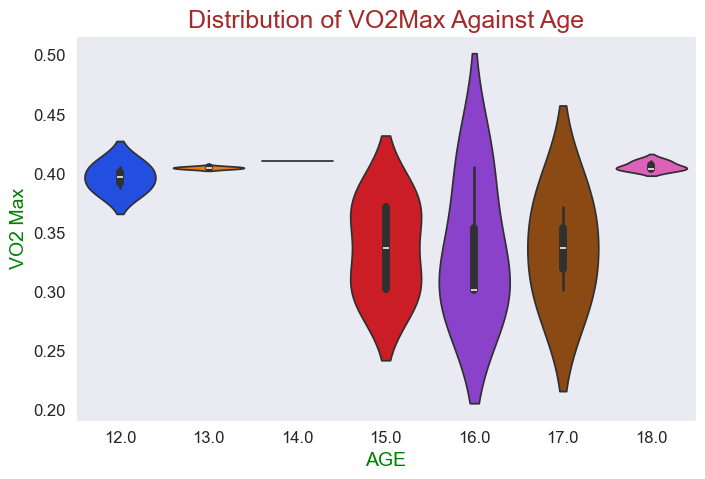

In [55]:
# Set the style of the plot
sns.set_style("dark" ,{"grid.color": ".5", "grid.linestyle": ":"})

# Defining plot area
plt.figure(figsize=(8, 5)) 

# Assigning x axis with age and y axis with VO2 Max
# Sort the athletes data by age in ascending order
sns.violinplot(x=ath.sort_values(by='age')['age'], y=final_table['VO2'],palette="bright")

# Assigning title and labels
plt.title('Distribution of VO2Max Against Age', fontsize=18, color ='brown')
plt.xlabel('AGE', fontsize=14, color='green');
plt.ylabel('VO2 Max', fontsize=14, color='green');
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

## Q78. Create a heatmap that show heart rate zones by minutes and the number of athletes in each HR and each minute.

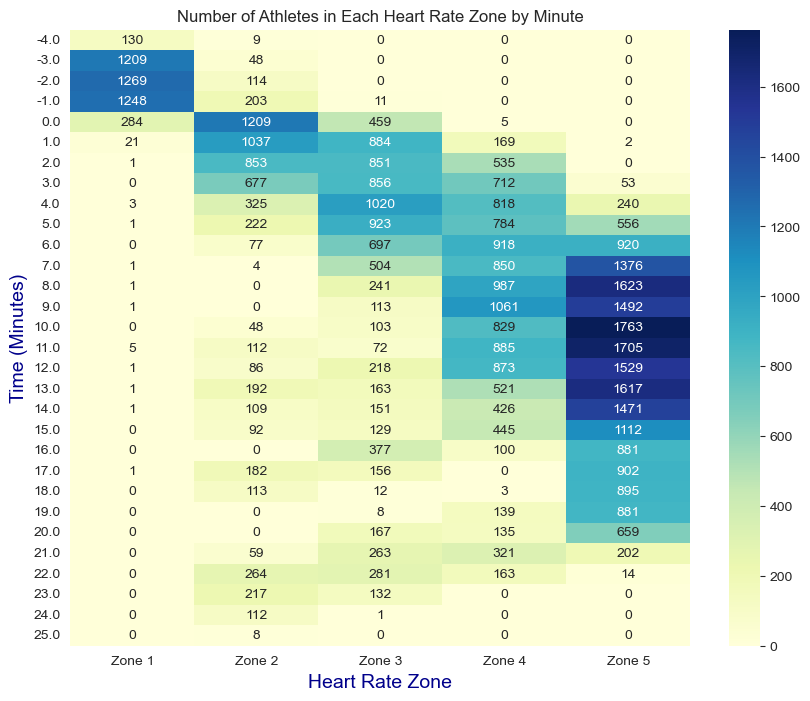

In [58]:
#Calculate time in minutes,Heart Rate(HR)=60/(RR/1000),Max HeartRate(MaxHR)=220-age
zone_merged=pd.DataFrame(final_table)
zone_ath=pd.DataFrame(ath)
zone_det=zone_merged.merge(zone_ath[['ID','age']],on='ID')
zone_det['HR']=60/(zone_det['RR']/1000)
zone_det['MaxHR']=220-zone_det['age']

# Create the 'Zone' column
conditions = [
    zone_det['HR'] < 100,
    (zone_det['HR'] >= 100) & (zone_det['HR'] < 120),
    (zone_det['HR'] >= 120) & (zone_det['HR'] < 135),
    (zone_det['HR'] >= 135) & (zone_det['HR'] < 155),
    (zone_det['HR'] >= 155)
]

choices = ['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5']

zone_det['Zone'] = pd.cut(zone_det['HR'], bins=[0, 100, 120, 135, 155, float('inf')], labels=choices, right=False)

# Group by Minute and Zone, then count the number of athletes
zone_det['Minute'] = zone_det['time'] // 60  # Convert time to minutes

zone_counts = zone_det.groupby(['Minute', 'Zone']).size().unstack(fill_value=0)

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(zone_counts, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

# Labels and Title
plt.title('Number of Athletes in Each Heart Rate Zone by Minute')
plt.xlabel('Heart Rate Zone',fontsize=14, color='darkblue')
plt.ylabel('Time (Minutes)',fontsize=14, color='darkblue')

# Show the heatmap
plt.show()


## Q79. Plot the Donut chart athlete Distribution by Gender

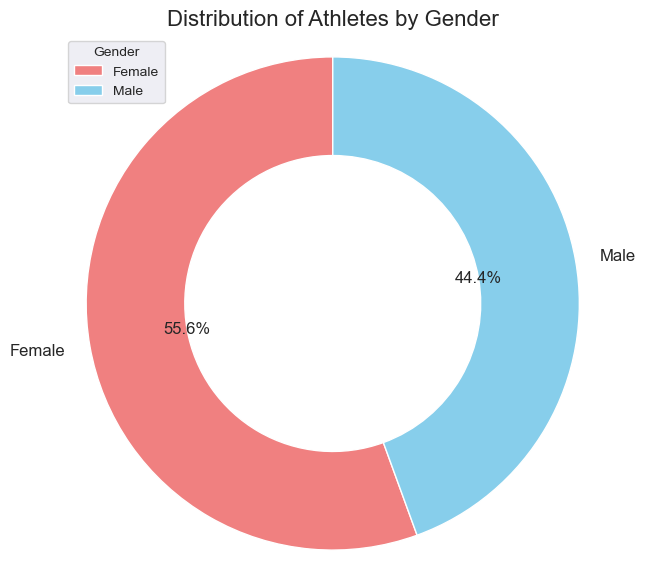

In [63]:

# Count the number of athletes by gender
gender_counts = ath['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

# Plotting the donut chart
plt.figure(figsize=(7,7))

# Pie chart with a 'donut' hole
plt.pie(gender_counts['Count'], labels=gender_counts['Gender'], autopct="%1.1f%%", 
        startangle=90, colors=['lightcoral','skyblue'], 
        wedgeprops={'width': 0.4}, textprops={'fontsize': 12})

# Draw a white circle at the center to create the 'donut' effect
centre_circle = plt.Circle((0, 0), 0.3, color='white', fc='white')
plt.gca().add_artist(centre_circle)

# Set title and show the plot
#lab= (gender_counts['Gender']+' '+gender_counts['Count'])
lab=gender_counts['Gender']
plt.legend(lab, loc="upper left", title="Gender")
plt.title('Distribution of Athletes by Gender', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Q80. find the size of Tuple for any given input.

In [66]:
# Took input from user
My_tuple = input("Enter Input: ")

# Count length of tuple and store in size
size = len(My_tuple)

print("Given tuple size: ",size) # Print the output

Enter Input:  Jyoti


Given tuple size:  5


In [3]:
print(sns.__version__)

0.13.2


In [9]:
print(matplotlib.__version__)

3.1.0
